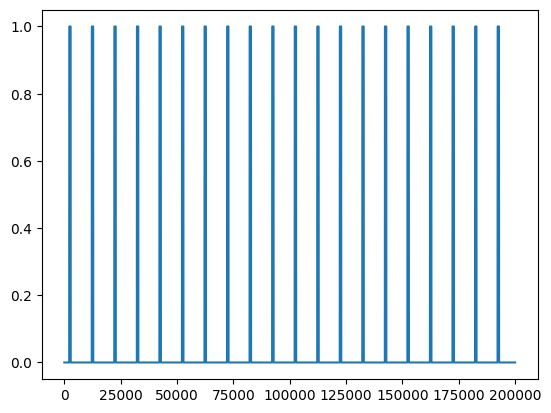

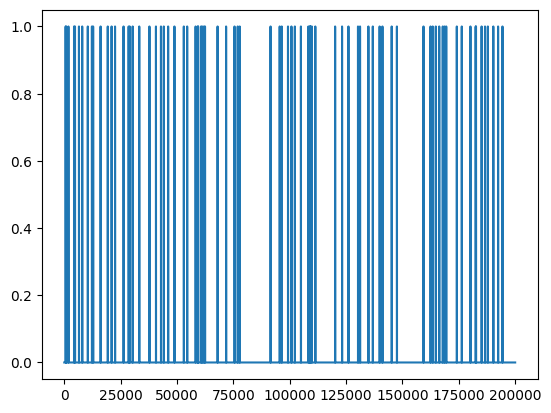

UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU

In [4]:
import uhd
import numpy as np
import matplotlib.pyplot as plt

usrp = uhd.usrp.MultiUSRP()

num_samps = 10000000 # number of samples received
center_freq = 2.44e9 # Hz
sample_rate = 50e6 # Hz
gain = 85 # dB

usrp.set_rx_rate(sample_rate, 0)
usrp.set_rx_freq(uhd.libpyuhd.types.tune_request(center_freq), 0)
usrp.set_rx_gain(gain, 0)


samples = np.random.randn(num_samps) + 1j*np.random.randn(num_samps) # create random signal
#######create square wave
sin = np.sin(np.linspace(0, 2000*np.pi, num_samps))
sin[np.abs(sin)<.98] = -1 
squarwave = np.sign(sin)*.5 + .5 # create square wave 
plt.plot(squarwave[0:num_samps//50])
plt.show()
#########################
# randdom squarewave
random_squarwave = np.abs(samples.copy())
random_squarwave[random_squarwave<3.9] = -1
random_squarwave = np.sign(random_squarwave)*.5 + .5

plt.plot(random_squarwave[0:num_samps//50])
plt.show()

# multiply signal by square wave to create on/off signal
samples = samples * random_squarwave
samples = samples.astype(np.complex64)
duration = 10 # seconds
# center_freqs = [2.43e9, 2.44e9, 2.45e9 ,2.46e9] # Hz
# center_freqs = 2.44e9 # Hz
while True:
        # for center_freq in center_freqs:
        usrp.send_waveform(samples, duration, center_freq, sample_rate, [0], gain)

In [ ]:
import uhd
import numpy as np
import time

# Configure the USRP device
def configure_usrp(device_addr=""):
    usrp = uhd.usrp.MultiUSRP(device_addr)
    
    # Set the TX frequency for channel 0
    tx_freq = 2.44e9  # 2.44 GHz
    usrp.set_rx_freq(uhd.libpyuhd.types.tune_request(tx_freq), 0)  # Channel 0

    # Set the TX sample rate
    tx_rate = 50e6  # 50 MS/s
    usrp.set_tx_rate(tx_rate)

    # Set the TX gain for channel 0
    tx_gain = 90  # in dB
    usrp.set_tx_gain(tx_gain, 0)  # Channel 0

    # Set the TX antenna for channel 0
    usrp.set_tx_antenna("TX/RX", 0)

    # Set the TX bandwidth for channel 0
    tx_bw = 40e6  # 1 MHz
    usrp.set_tx_bandwidth(tx_bw, 0)  # Channel 0

    return usrp

# Generate a simple sine wave
def generate_sine_wave(freq, sample_rate, duration, amplitude=0.5):
    t = np.arange(0, duration, 1/sample_rate)
    waveform = amplitude * np.exp(2j * np.pi * freq * t)
    return waveform

# Transmit the waveform
def transmit_waveform(usrp, waveform, sample_rate):
    st_args = uhd.usrp.StreamArgs("fc32", "sc16")  # 32-bit floating complex
    st_args.channels = [0]  # Channel 0
    tx_streamer = usrp.get_tx_stream(st_args)

    samples_per_buffer = tx_streamer.get_max_num_samps()
    metadata = uhd.types.TXMetadata()

    # Break the waveform into buffers of appropriate size
    waveform_buffers = [
        waveform[i:i + samples_per_buffer] for i in range(0, len(waveform), samples_per_buffer)
    ]

    # Transmit the buffers
    for buf in waveform_buffers:
        tx_streamer.send(buf,metadata)

# Main function
def main():
    device_addr = "type=b200"  # Replace with your device address if necessary
    usrp = configure_usrp(device_addr)
    sample_rate = 50e6  # 50 MS/s
    duration = 10 # 1 second
    # Generate a sine wave at 1 kHz
    num_samps = int(sample_rate*duration)
    # sine_wave = generate_sine_wave(freq=1e3, sample_rate=1e6, duration=1)
    sine_wave = np.random.randn(num_samps) + 1j*np.random.randn(num_samps) # create random signal

    # Transmit the sine wave over channel 0
    transmit_waveform(usrp, sine_wave, sample_rate=sample_rate)

    print("Transmission complete!")

if __name__ == "__main__":
    main()


[INFO] [UHD] Mac OS; Clang version 15.0.0 (clang-1500.1.0.2.5); Boost_107100; UHD_3.15.0.0-MacPorts-Release
[INFO] [B200] Detected Device: B210
[INFO] [B200] Operating over USB 3.
[INFO] [B200] Initialize CODEC control...
[INFO] [B200] Initialize Radio control...
[INFO] [B200] Performing register loopback test... 
[INFO] [B200] Register loopback test passed
[INFO] [B200] Performing register loopback test... 
[INFO] [B200] Register loopback test passed
[INFO] [B200] Setting master clock rate selection to 'automatic'.
[INFO] [B200] Asking for clock rate 16.000000 MHz... 
[INFO] [B200] Actually got clock rate 16.000000 MHz.
[INFO] [B200] Asking for clock rate 50.000000 MHz... 
[INFO] [B200] Actually got clock rate 50.000000 MHz.
